<a id='intro'></a>
# Udacity Project 2: Investigate TMDB dataset
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. It consist of 21 columns. This project will majorly focus on finding insights from the dataset through exploring and visualizing the data.


In [338]:
# import packages
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this step we will explore and deal with the missing or inappropriate data. After an initial screening and cleaning of the data we will try to come up with some meaningful questions that we would to answer from this dataset.

### General Properties

In [339]:
# Load Data
df_movies_data = pd.read_csv('tmdb_movies.csv')
df_movies_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Questions posed

>Which director is associated with most big revenues movies?

>Compare budgets and revenues of movies before 2000 and after 2000

>How budget correlates with revenues? Does big budget assures big revenue?

In [340]:
# Dropping below columns to improve the view/performance of the dataframe as we are not performing 
#any qualitative analysis regarding these columns

df_movies_data = df_movies_data.drop(['id','genres','production_companies','cast', 'homepage', 'tagline', 'keywords', 'overview', 'imdb_id'], axis=1)

In [341]:
df_movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1018.8+ KB


In [342]:
df_movies_data.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [343]:
df_zero_data=df_movies_data[(df_movies_data['budget']==0) | (df_movies_data['runtime']==0) | (df_movies_data['revenue']==0)]
df_zero_data.shape

(7011, 12)

### Initial Findings and Cleaning Process
* Changing Release_date column's data type to date from string.
* Removing all the rows with budget,revenue or runtime values as 0 because:
    * These values are incorrect
    * Filling in with mean might bias the data
* Assigning 'Unknown' value to the director column with missing values

In [344]:
# Convert release_date (object datatype) to date.

df_movies_data['release_date'] = pd.to_datetime(df_movies_data['release_date'])

In [345]:
df_movies_data.drop_duplicates(inplace=True)

In [346]:
# dropping rows with zero values
df_movies_data.drop(df_movies_data[(df_movies_data['budget']==0) | (df_movies_data['runtime']==0) | (df_movies_data['revenue']==0)].index, inplace=True)

In [347]:
df_movies_data.director.fillna("Unknown", inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which director is associated with most big revenues movies?)

In [348]:
# For this analysis I am using top20 movies sorted by revenue from high to low
df_top20_revenue = df_movies_data.nlargest(20,'revenue_adj')

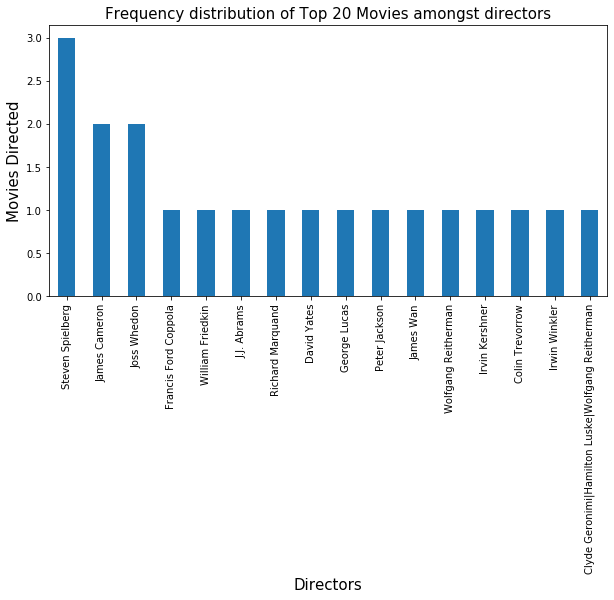

In [349]:
#giving the figure size(width, height)
plt.figure(figsize=(10,5))
#x-axis label name
plt.xlabel('Directors', fontsize = 15)
#y-axis label name
plt.ylabel('Movies Directed', fontsize=15)
#title of the graph
plt.title('Frequency distribution of Top 20 Movies amongst directors', fontsize=15)

df_top20_revenue.director.value_counts().plot(kind='bar');

#plt.bar(df_top19_revenue.director.value_counts().index,df_top19_revenue.director.value_counts());
#plt.xticks(rotation='vertical');

#displays the plot
#plt.show()

### Finding
* Steven Spielberg has directed most(3) movies out of top 20 revenue movies

### Research Question 2  (Compare budgets and revenues of movies before 2000 and after 2000)

In [350]:
#Before Year 2000 dataset
df_movies_before_2000 = df_movies_data[df_movies_data.release_year <= 2000]


In [351]:
#After Year 2000 dataset
df_movies_after_2000 = df_movies_data[df_movies_data.release_year > 2000]


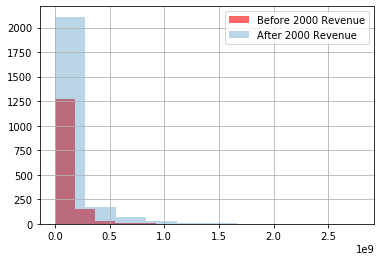

In [352]:
df_movies_before_2000.revenue.hist(alpha=0.6, label = "Before 2000 Revenue", color= 'red')
df_movies_after_2000.revenue.hist(alpha=0.3, label = "After 2000 Revenue")
plt.legend();

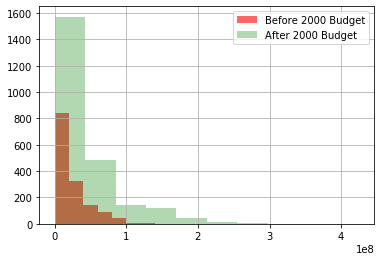

In [353]:
df_movies_before_2000.budget.hist(alpha = 0.6, label = "Before 2000 Budget", color = 'red')
df_movies_after_2000.budget.hist(alpha = 0.3, label = "After 2000 Budget", color='green')
plt.legend();

### Findings

* Both revenue's and budget's distributions are more vast in After 2000 movies
* Some movies in 'After 2000' crossed 1 Billion dollar point
* Some movies in 'After 2000' crossed 200 Million dollar point

### Research Question 3  (Which factors have a positive correlation with revenue_adj? Is it a causation or correlation?)

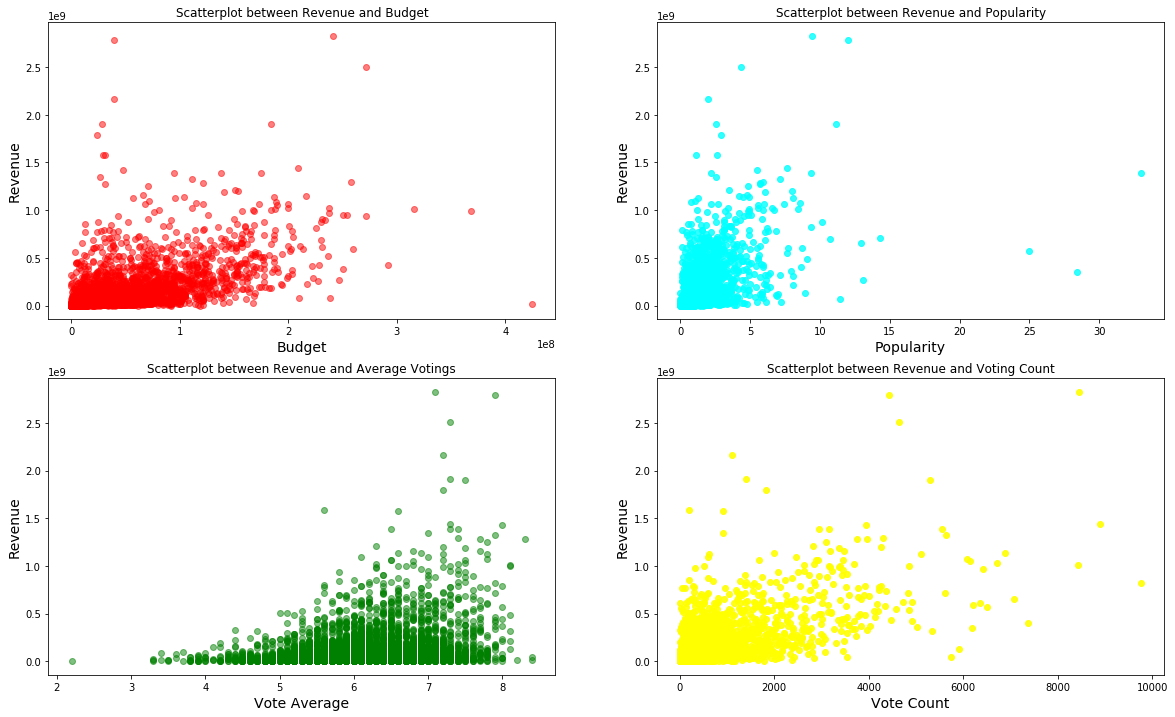

In [354]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(20,12))
ax=ax.flatten()
ax[0].scatter(df_movies_data['budget_adj'], df_movies_data['revenue_adj'],alpha=0.5,color='red')
ax[0].set_title('Scatterplot between Revenue and Budget')
ax[0].set_xlabel('Budget',fontsize = 14)
ax[0].set_ylabel('Revenue', fontsize = 14)

ax[1].scatter(df_movies_data['popularity'], df_movies_data['revenue_adj'],alpha=0.8,color='cyan')
ax[1].set_title('Scatterplot between Revenue and Popularity')
ax[1].set_xlabel('Popularity',fontsize = 14)
ax[1].set_ylabel('Revenue', fontsize = 14)

ax[2].scatter(df_movies_data['vote_average'], df_movies_data['revenue_adj'],alpha=0.5,color='green')
ax[2].set_title('Scatterplot between Revenue and Average Votings')
ax[2].set_xlabel('Vote Average',fontsize = 14)
ax[2].set_ylabel('Revenue', fontsize = 14)

ax[3].scatter(df_movies_data['vote_count'], df_movies_data['revenue_adj'],alpha=0.9,color='yellow')
ax[3].set_title('Scatterplot between Revenue and Voting Count')
ax[3].set_xlabel('Vote Count',fontsize = 14)
ax[3].set_ylabel('Revenue', fontsize = 14);

### Findings

* Budget and Poularity are showing some correlation with Revenue, but its not concrete to make a conclusion.
* Vote Count has highest correlation with Revenue, which suggests that movies with greater vote counts earn more revenue
* It is not completely spurious as I checked on IMDB, some of the top 10 voted movies are listed in top 10 earning movies

<a id='conclusions'></a>
## Conclusions

* Based on highest grossing movies, Steven Speilberg and James Cameron are famous directors.
* In my opinion, as in the past few years the use of VFX and other technologies have increased, therefore there is a surge in the budgets of movies that are released after the year 2000.
* There is no particular factor that ensures the monetary success of a movie.

## Limitations

* The size of the dataset decreased significantly because in the data cleaning process I had to drop the rows with incorrect values.
* Analysis of director's presence in movies is based only on few top revenue movies.